In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
data=pd.read_csv("Advertising.csv")
data.head(5)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


There is one unnecessary column so we will remove that column i.e. 'Unnamed:0'

In [30]:
data=data.drop(columns=['Unnamed: 0'],axis=1)

In [31]:
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [32]:
data.shape

(200, 4)

In [33]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


##### Checking for the null values

In [34]:
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [38]:
data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

##### Dealing with zero values present in radio column

In [36]:
data.loc[data['radio']==0]

,TV,radio,newspaper,sales
127,80.2,0.0,9.2,8.8


In [37]:
data['radio']=data['radio'].replace(0.0,data['radio'].mean())

##### Let's see how data is distributed for every column

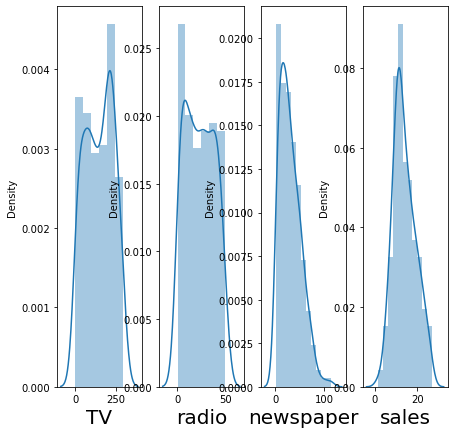

In [44]:
plt.figure(figsize=(7,7))
plotnumber=1
for column in data:
    if plotnumber<=4:
        ax=plt.subplot(1,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()
    

#### Visualizing the relationship between the features and the target variables using scatterplots

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

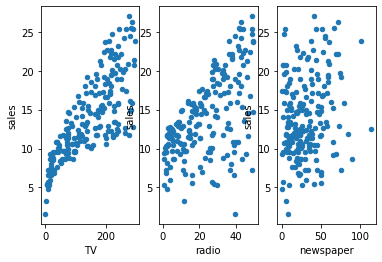

In [45]:
fig,axs=plt.subplots(1,3)

data.plot(kind='scatter',x='TV',y='sales',ax=axs[0])
data.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
data.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])

There is some trend in TV and radio but no trend in newspaper

#### Now Let's Check the correlation of the features with the target variable 

In [46]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.048983,0.056648,0.782224
radio,0.048983,1.000000,0.348551,0.571898
newspaper,0.056648,0.348551,1.000000,0.228299
sales,0.782224,0.571898,0.228299,1.000000


<AxesSubplot:>

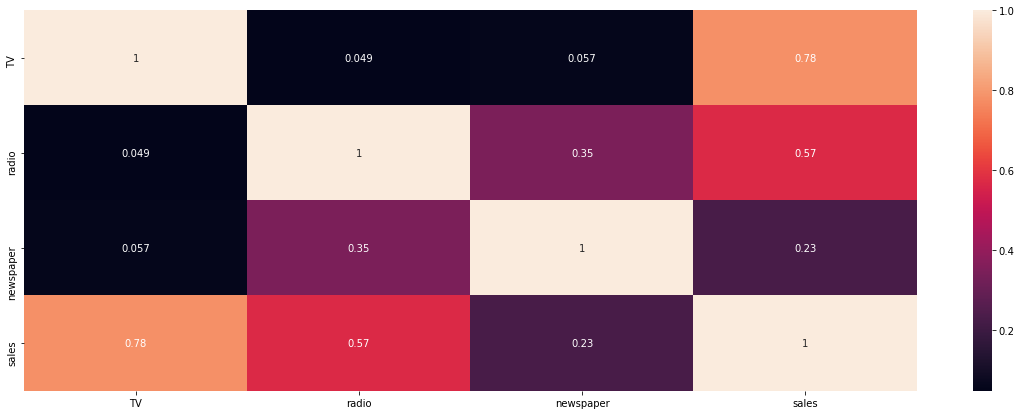

In [47]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(),annot=True)

TV and radio has very good relationship with the sales but newspaper has not good relationship

#### Visualize the outliers using boxplot

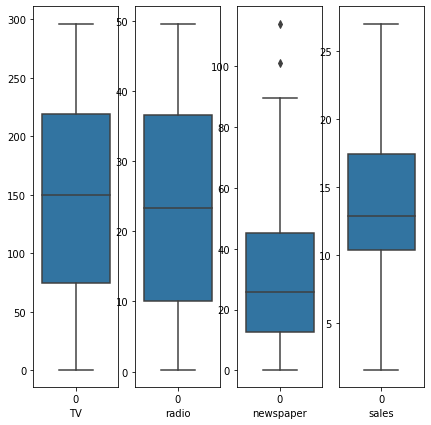

In [51]:
plt.figure(figsize=(7,7))
graph=1
for column in data:
    if graph<=5:
        ax=plt.subplot(1,4,graph)
        sns.boxplot(data=data[column],orient='v')
        plt.xlabel(column)
    graph+=1
plt.show()

##### Removing outliers using zscore

In [54]:
from scipy.stats import zscore
import numpy as np

In [55]:
z=np.abs(zscore(data))
z.shape

(200, 4)

In [56]:
print(np.where(z>3))   # setting threshold=3

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [57]:
data_new=data[(z<3).all(axis=1)]

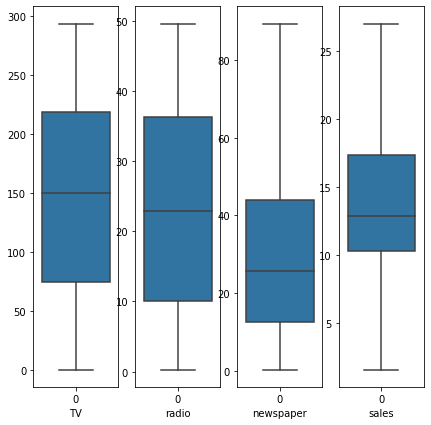

In [59]:
plt.figure(figsize=(7,7))
graph=1
for column in data_new:
    if graph<=5:
        ax=plt.subplot(1,4,graph)
        sns.boxplot(data=data_new[column],orient='v')
        plt.xlabel(column)
    graph+=1
plt.show()

In [60]:
data_new.shape

(198, 4)

#### Dividing dataset into features and target variable

In [63]:
x=data_new.drop(columns=['sales'])
y=data_new['sales']

##### Checking for skewness

In [64]:
x.skew()

TV          -0.082332
radio        0.112591
newspaper    0.650112
dtype: float64

There is some skewness in newspaper so we will remove it by power transform function

In [62]:
from sklearn.preprocessing import power_transform

In [65]:
x_new=power_transform(x)

In [68]:
x=pd.DataFrame(x_new,columns=x.columns)

In [69]:
x

,TV,radio,newspaper
0,0.955983,0.968421,1.604196
1,-1.192003,1.046580,0.831044
2,-1.646125,1.377829,1.607052
3,0.142934,1.149052,1.283768
4,0.456452,-0.754644,1.280622
...,...,...,...
193,-1.288311,-1.448054,-0.687435
194,-0.521579,-1.311135,-1.146090
195,0.416577,-0.883112,-1.314437
196,1.467535,1.184469,1.517395


#### Scaling the data using standard scaler

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
LR=LinearRegression()

#### Finding the best random state

In [79]:
maxAccu=0
maxRS=0
for i in range(1,10000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    LR.fit(x_train,y_train)
    y_pred=LR.predict(x_test)
    accu=r2_score(y_test,y_pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print('Max accuracy is ',maxAccu,'on random state',maxRS)    

Max accuracy is  0.9483564187065663 on random state 8601


In [80]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=8601)
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
accu=r2_score(y_test,y_pred)

In [81]:
accu

0.9483564187065663

### Cross Validation

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
cvs=cross_val_score(LR,x_scaled,y,cv=5)
print(cvs.mean())

0.895261049556459


### Regularization

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [101]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10)),'max_iter':[100,200,500,1000],'normalize':[True,False]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'max_iter': 100, 'normalize': True, 'random_state': 0}


In [104]:
ls=Lasso(alpha=0.001,random_state=0,max_iter=100,normalize=True)
ls.fit(x_train,y_train)

Lasso(alpha=0.001, max_iter=100, normalize=True, random_state=0)

In [105]:
ls.score(x_train,y_train)

0.8915470832137666

In [106]:
ls_pred=ls.predict(x_test)
lss=r2_score(y_test,ls_pred)

In [107]:
lss

0.948044956317772

### Ensemble Technique

In [108]:
from sklearn.ensemble import RandomForestRegressor

In [110]:
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [115]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(x_train,y_train)


RandomForestRegressor(criterion='mae')

In [116]:
rf.score(x_train,y_train)

0.9961682705775946

In [117]:
rf_pred=rf.predict(x_test)
rfs=r2_score(y_test,rf_pred)
rfs

0.983488777494147

In [118]:
rfscore=cross_val_score(rf,x_scaled,y,cv=5)
print(rfscore.mean())

0.9741277482023263


In [119]:
filename='Advertisement.pkl'
pickle.dump(rf,open(filename,'wb'))